## Homework 2 Solution

### Problem 1

The expression for the inter-seismic velocity for a fault located at $x=c$ with slip rate $s$ and locking depth $d$ is

$v(x)=\frac{s}{\pi}\arctan(\frac{x-c}{d})$

Linearity applies so this can easily be generalized to N faults with different locations, slip rates and locking depths, where the total inter-seismic velocity will be:

$v(x)=\sum_{i=1}^N\frac{s_i}{\pi}\arctan(\frac{x-c_i}{d_i})$

### Problem 2

Thus for the SAF with a slip rate of 5cm/yr and locking depth of 10km the following velocity profile is obtained

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# define x coordinate
min_x = -50
max_x = 50
Npoints = 100
x = np.linspace(min_x,max_x,Npoints)

#fault properties
slip_rate_in_cm = 5.0
fault_location_in_km = 0
fault_depth_in_km = 10

#velocity profile, make it a function since this will be used again
def intersesimic_velocity(x,slip_rate,location,depth):
    velocity = (slip_rate/np.pi)*np.arctan((x-location)/depth)
    return velocity

vel=intersesimic_velocity(x,slip_rate_in_cm,fault_location_in_km,fault_depth_in_km)

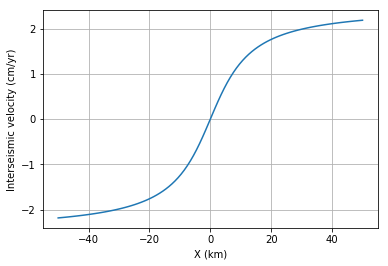

In [13]:
# plot it
plt.figure()
plt.plot(x,vel)
plt.grid()
plt.xlabel('X (km)')
plt.ylabel('Interseismic velocity (cm/yr)')
plt.show()

### Problem 3

Repurpose the function from problem 2 and use linearity to superimpose solutions

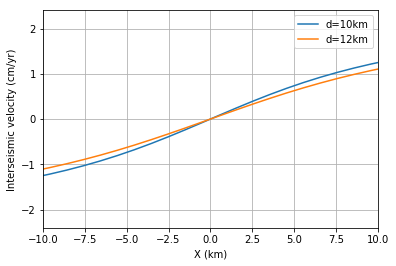

In [17]:
#locking depth of 10
vel1 = intersesimic_velocity(x,5,0,10)

#locking depth of 12 everything else the same as before
vel2 = intersesimic_velocity(x,5,0,12)

#plot and zoom in
plt.figure()
plt.plot(x,vel1,label='d=10km')
plt.plot(x,vel2,label='d=12km')
plt.grid()
plt.xlabel('X (km)')
plt.ylabel('Interseismic velocity (cm/yr)')
plt.legend()
plt.xlim([-10,10])
plt.show()

If she is measuring at x=1,w e can take the difference of the two inter-seismic velocities

In [23]:
diff_at_1 = intersesimic_velocity(1,5,0,10) - intersesimic_velocity(1,5,0,12)
print('Difference at x=1km is %.3f cm' % diff_at_1)

Difference at x=1km is 0.026 cm


So when is that greater than the measurememnt uncertainty of 0.1cm?

In [27]:
years_until_larger = 0.1/diff_at_1
print('After %.2f years the difference is larger than the measurement uncertainty' % years_until_larger)

After 3.80 years the difference is larger than the measurement uncertainty


### Problem 4

This can be solved using the explicit form of the strain rate or simply by taking the spatial derivative of the velocity in the x direction. Here we will take the derivative since we already have a function for computing velocities

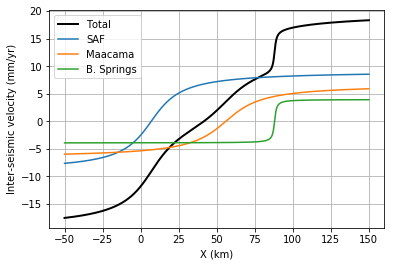

In [38]:
# re-define x coordinate
min_x = -50
max_x = 150
Npoints = 10000  #add lots of points to ensure a nice derivative
x = np.linspace(min_x,max_x,Npoints)

#get velocities
v_SAF = intersesimic_velocity(x,18.3,7.0,15)
v_Maa = intersesimic_velocity(x,13.4,56.0,18)
v_BS = intersesimic_velocity(x,7.9,88.0,1)

#Add them together
v_total = v_SAF + v_Maa + v_BS

#Plot them to check everything is ok
plt.figure
plt.plot(x,v_total,'k',lw=2,label='Total')
plt.plot(x,v_SAF,label='SAF')
plt.plot(x,v_Maa,label='Maacama')
plt.plot(x,v_BS,label='B. Springs')
plt.xlabel('X (km)')
plt.ylabel('Inter-seismic velocity (mm/yr)')
plt.legend()
plt.grid()
plt.show()

Looks good, recall the strainr ate will simply be:

$\dot{\epsilon} = \frac{dv}{dx}$

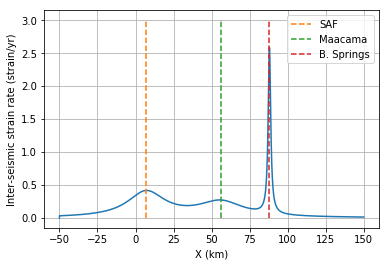

In [41]:
# the derivative is strain_rate = dv/dx
dx=x[1]-x[0]
strain_rate = np.diff(v_total)/dx
#need to append starting 0
strain_rate = np.r_[0,strain_rate]

plt.figure()
plt.plot(x,strain_rate)
plt.plot([7,7],[0,3.0],'--',label='SAF')
plt.plot([56,56],[0,3.0],'--',label='Maacama')
plt.plot([88,88],[0,3.0],'--',label='B. Springs')
plt.xlabel('X (km)')
plt.ylabel('Inter-seismic strain rate (strain/yr)')
plt.legend()
plt.grid()
plt.show()

Is this result surprising? Perhaps it's a littel counter-intutitve that the faster slipping fault, the SAF, does not have the larger strain rate. This has to do with the locking depth. The Bartlet Springs fault has a **very** shallow locking depth, this means that the deformation needs to be accomdated by less elastic material and thus the strain will be much higher. It is still true generally that faster slipping faults will have larger strain rates, note the SAF still has larger strain rate then the Maacama. However the locking depth is a confounding variable which needs to be considered as well.